##### Import packages

In [1]:
import pandas as pd
import CleanTweets as ct

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Read the json generated from snscrape

In [2]:
benin_bronze = pd.read_json('../data/benin-bronze.json', lines=True)
benin_bronzes = pd.read_json('../data/benin-bronzes.json', lines=True)

In [3]:
print(benin_bronze.shape)
print(benin_bronzes.shape)

(6388, 28)
(9986, 28)


##### Set desired optoins to view dataframe

In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

##### Initial data check or viewing

In [5]:
benin_bronze[['content']].sample(10)

,content
353,Church of England Offers to Return Two Benin Bronze Sculptures to Nigeria https://t.co/afAz2Q3i77
3748,@Be__Guided @WonderingWoods @ophy_dami @MsCharity429 @burnaboy @BET @BETAwards Tell him to read about the Benin empire how they(Europeans )invaded benin city that was thriving on its own that has already been creating bronze craft
3418,"MEMORIAL HEAD\n15th/early 16th century (Early Period)\nFrom Benin\nNational Museum \nAccording to oral tradition, bronze casting was introduced into Benin from Ife toward the end of the fourteenth century, but clearly… https://t.co/fcoirQLUx2"
4290,Benin Bronze https://t.co/TFyvUefaYG
5923,Cambridge college's Stolen Benin bronze cockerel must go back to Nigeria - Students https://t.co/l5QkTld8U4 https://t.co/E3KTDsGpfh
2162,"3./ We had to use a reproduction authorised by his majesty; Oba Akenzua 11 – Patron of the Benin Bronze casters, Ivory, Wood carvers (and other) Guilds."
4843,Nun gibt es erste Proteste gegen die Versteigerung der #BeninBronze und Forderung nach genauer #Provenienzforschung und evtl. #Restitution nach Nigeria durch NGO #BerlinPostkolonial https://t.co/c5ghjHazfk
2281,Benin Bronze. #metalwork #Ancientafrica #Benin #nigeria\n#westafricanmigration #Africa #africanhistory #blackhistory #history #ethnique\nhttps://t.co/UN365HF1TO
3790,Benin Bronze Sculpture for sale \n \nhttps://t.co/Fjvrm4xGdK \n\n#vintage #sculpture https://t.co/7JlS09ozeI
4423,Identify three uses of Bronze in the kingdom of Benin https://t.co/lad3eeph3T


In [6]:
benin_bronzes[['content']].sample(10)

,content
4792,";))... no, is not about the pope here, but the heavily critized #humboldtforum museum which opened yday. #returnthem #beninbronzes!! \nhttps://t.co/zC5yoYD1qw\nhttps://t.co/Al4LTt1MME https://t.co/HuQdAs1XvE"
9615,Western museums try to forge deal with west Africa to return the Benin bronzes - the guardian https://t.co/zIYTFPuFAC
8144,"""@allafrica: British, French Museums to Return #Benin Bronzes After Over 100 Yrs: https://t.co/rNCvDk3bVw #Nigeria https://t.co/NqIe9fCC7Q"""
8958,British Museum offers to loan stolen Benin Bronzes to Nigeria https://t.co/BeIJVfONCZ
8220,Britain Set To Return Looted Benin Bronzes To Nigeria After Over 100 Years https://t.co/x8zJmWpU5R
8195,Britain Set To Return Looted Benin Bronzes To Nigeria After Over 100 Years https://t.co/gMmEa0UZpJ https://t.co/hfHj2YZOdL
367,"I hope people are enjoying the latest @MuseumsAssoc Museums Journal. Articles on gender representation art, Northern Ireland centenary, Benin bronzes, contactless donations, Gabriele Finaldi profile and lots more https://t.co/knrc21SNFO https://t.co/YtQtCid3KD"
5245,Saturday's Collectors: Congolese collector Sindika Dokolo dies at 48yo; Architect David Adjaye designs new museum for Benin Bronzes; and John Water's donates his collection to Baltimore Museum of Art. \nhttps://t.co/tdc7tPqiV6 https://t.co/twbSc1eOir
7122,"Too much of the literature on ""repatriation"" lumps together Elgin Marbles, Benin bronzes, Native American bodies, Holocaust assets, etc. These are NOT the same stories -- except to the museums, who see the question in terms only of possession or loss."
9753,European museums to ‘loan’ looted Benin bronzes to Nigeria? - https://t.co/2bpc9vJQG1 via @FahamuAfrica


In [7]:
benin_bronzes.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

In [8]:
benin_bronze.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags'],
      dtype='object')

##### Concatenate the two datasets

In [9]:
bb_df = pd.concat([benin_bronze, benin_bronzes])
bb_df.shape

(16374, 28)

##### Import nltk in prep for clean_tweets

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Njabulo Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##### clean tweets with the below parameters

In [11]:
df_clean = ct.clean_tweets(bb_df,content='content',col_name='clean_tweet',
                general_clean=True,lemma=True,stem=False,remove_tag=True,remove_mention=True,
                remove_emoji=False, remove_stopword=True,min_length=2, untokenized_return=True
                )

time taken to clean tweets: 96.33490777015686s. Use the [clean_tweet] column to perform your analysis/modeling on


In [12]:
df_clean.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,clean_tweet
0,snscrape.modules.twitter.Tweet,https://twitter.com/kibondi/status/1399939533966303240,2021-06-02 04:02:49+00:00,@alaminkimathi Benin Kingdom in Nigeria has kept this tradition going upto date am here and this guys are doing alot including bronze casting https://t.co/mGNNZaTlt7,@alaminkimathi Benin Kingdom in Nigeria has kept this tradition going upto date am here and this guys are doing alot including bronze casting https://t.co/mGNNZaTlt7,1399939533966303240,"{'_type': 'snscrape.modules.twitter.User', 'username': 'kibondi', 'id': 1138214201271422982, 'displayname': 'Kibondi', 'description': 'Human rights activist', 'rawDescription': 'Human rights activist', 'descriptionUrls': None, 'verified': False, 'created': '2019-06-10T22:39:47+00:00', 'followersCount': 26, 'friendsCount': 68, 'statusesCount': 370, 'favouritesCount': 94, 'listedCount': 0, 'mediaCount': 39, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1270801840469356545/OHyykE71_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1138214201271422982/1591817653', 'url': 'https://twitter.com/kibondi'}",0,0,0,0,1399386995919630337,en,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",http://twitter.com/download/android,Twitter for Android,None,None,"[{'_type': 'snscrape.modules.twitter.Photo', 'previewUrl': 'https://pbs.twimg.com/media/E22VlaqWQAIxDF4?format=jpg&name=small', 'fullUrl': 'https://pbs.twimg.com/media/E22VlaqWQAIxDF4?format=jpg&name=large'}]",NaN,None,1.399387e+18,"{'_type': 'snscrape.modules.twitter.User', 'username': 'alaminkimathi', 'id': 470042842, 'displayname': 'UtuNow!', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'url': 'https://twitter.com/alaminkimathi'}","[{'_type': 'snscrape.modules.twitter.User', 'username': 'alaminkimathi', 'id': 470042842, 'displayname': 'UtuNow!', 'description': None, 'rawDescription': None, 'descriptionUrls': None, 'verified': None, 'created': None, 'followersCount': None, 'friendsCount': None, 'statusesCount': None, 'favouritesCount': None, 'listedCount': None, 'mediaCount': None, 'location': None, 'protected': None, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': None, 'profileBannerUrl': None, 'url': 'https://twitter.com/alaminkimathi'}]",None,None,None,None,benin kingdom nigeria kept tradition go upto date guy alot include bronze cast
1,snscrape.modules.twitter.Tweet,https://twitter.com/seethingsista/status/1399831065192108032,2021-06-01 20:51:48+00:00,"I'm hearing today about this Museum repatriation and that Germany and France have decided to return all or some of the bronzes looted from Benin, WHILE Great Britain and the Metropolitan Museum of Modern Art, who also have tons of bronze looted from beanie, have remained silent.","I'm hearing today about this Museum repatriation and that Germany and France have decided to return all or some of the bronzes looted from Benin, WHILE Great Britain and the Metropolitan Museum of Modern Art, who also have tons of bronze looted from beanie, have remained silent.",1399831065192108032,"{'_type': 'snscrape.modules.twitter.User', 'username': 'seethingsista', 'id': 1182499777688166402, 'displayname': 'Wu to the Wei', 'description': 'Choose a self and stand by it -William James. #INTJ', 'rawDescription': 'Choose a self and stand by it -W

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

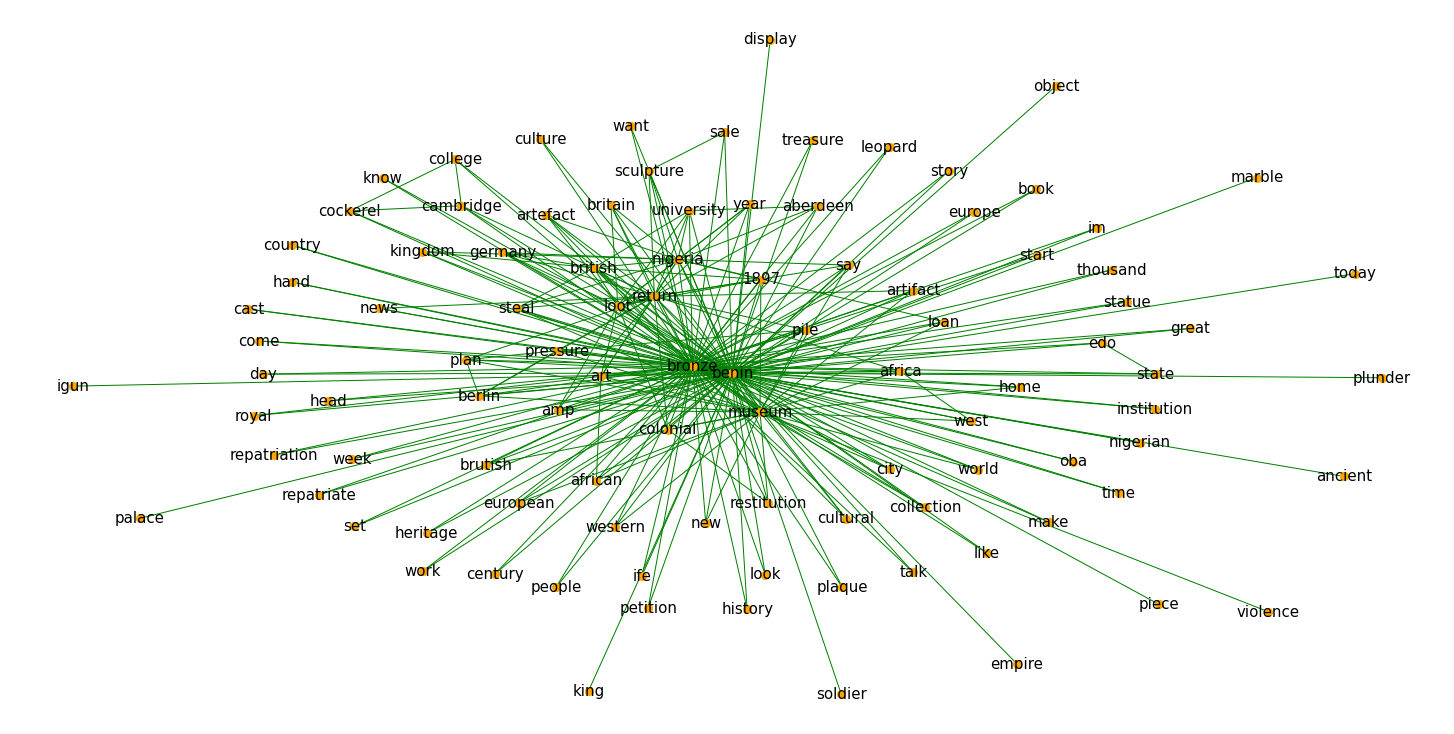

In [16]:
def network_diagram(content_col, filt_val):
    """Draws a network diagram from a given text column
    
        Args:
            :param content_col: Series of strings, column we wish to get a network of.
            :param filt_val: integer, higher numbers filters only on words that have the 
            strongest connection
    """
    
    # You can define your own parameters
    cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') 
    X = cv.fit_transform(content_col)

    # This is the matrix manipulation step
    Xc = (X.T * X) 

    # This are the entity names (i.e. keywords)
    names = cv.get_feature_names() 
    
    # create dataframe of similar names
    df_co = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)

    # put df in workable format
    a = df_co.stack().reset_index()
    a.columns = ['var1', 'var2','value']

    a_filtered=a.loc[ (a['value'] > filt_val) & (a['var1'] != a['var2']) ]


    # Build your graph
    plt.figure(figsize=(20,10))

    G=nx.from_pandas_edgelist(a_filtered, 'var1', 'var2')

    # Plot the network
    nx.draw(G, with_labels=True, node_color='orange', node_size=50, edge_color='green', linewidths=2, font_size=15)

network_diagram(df_clean.clean_tweet, 250)

In [19]:
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Njabulo
[nltk_data]     Magd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
str(df_clean.loc[1]['clean_tweet'])

'1    im hearing today museum repatriation germany france decide return bronze loot benin great britain metropolitan museum modern art also ton bronze loot beanie remain silent\n1                                                                                                                             sociology professor call destruction benin bronze\nName: clean_tweet, dtype: object'

In [43]:
df_clean.loc[1]['content']

1    I'm hearing today about this Museum repatriation and that Germany and France have decided to return all or some of the bronzes looted from Benin, WHILE Great Britain and the Metropolitan Museum of Modern Art, who also have tons of bronze looted from beanie, have remained silent.
1                                                                                                                                                                                                Sociology professor calls for the destruction of the Benin bronzes. https://t.co/eG5siX0xEi
Name: content, dtype: object

In [27]:
te.get_emotion(str(df_clean.loc[1]['clean_tweet']))

{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.67}

In [29]:
df_clean.columns

Index(['_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'clean_tweet'],
      dtype='object')

In [30]:
df_5000 = df_clean.sample(5000)

In [31]:
df_5000.shape

(5000, 29)

In [34]:
df_1000 = df_clean.sample(1000)
df_1000["emotion_dict"] = df_1000['content'].apply(lambda x: te.get_emotion(x))

In [35]:
df_5000["emotion_dict"] = df_5000['content'].apply(lambda x: te.get_emotion(x))

In [36]:
from collections import Counter

In [37]:
df_5000['emotion_counter'] = df_5000['emotion_dict'].apply(lambda x: Counter(x))

In [38]:
df_5000['emotion_counter'].sum()

Counter({'Surprise': 868.2700000000018,
         'Fear': 1447.2000000000028,
         'Happy': 415.909999999999,
         'Sad': 618.21,
         'Angry': 95.94000000000001})

In [39]:
def normalize(d, target=100):
   raw = sum(d.values())
   factor = target/raw
   return {key:value*factor for key,value in d.items()}

In [40]:
df_5000 = normalize(df_5000['emotion_counter'].sum())

<BarContainer object of 5 artists>

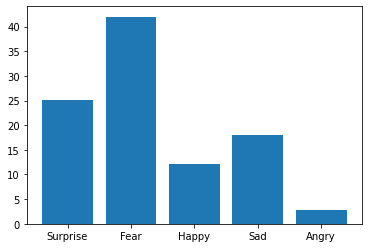

In [41]:
plt.bar(df_5000.keys(), df_5000.values())